# FSGP 2024 SOC from voltage using cell datasheet

Using the functions in `soc_from_voltage.py`, we can now estimate the state of charge at points during FSGP 2024. This method for estimating SOC is relatively crude since it doesn't account for the way the battery reacts to being charged or discharged at different rates. This method works best if the datasheet voltage is accurate, (and that we are close to the 2A curve provided), and when the battery is in a 'relaxed' state, so we can read its equilibrium voltage.

To use the cell data to estimate the SOC during the race, we need to get a best guess as to what the relaxed battery voltage would be. To do this, I take a windowed maximum of the voltage across the battery, which is likely to represent a point in time where there is not much current being drawn. This is still not very accurate because in reality the battery needs more time to relax. The most relevant real application of this method for estimating SOC is to get a quick estimate of how much energy remains during race down-time, such as at the end of the race day.

Creating client with API Token: Hgnv70HqoniXv8D5S9rS-4jLIfhG4QlneuR4igLx31MOAB7aPo6NmzLAejbhDtDnBdSU2GQXmoNgfKpoJcqjnA==
Creating client with Org: 8a0b66d77a331e96


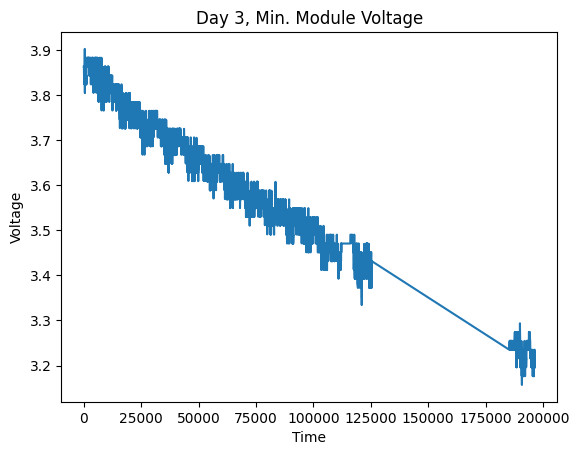

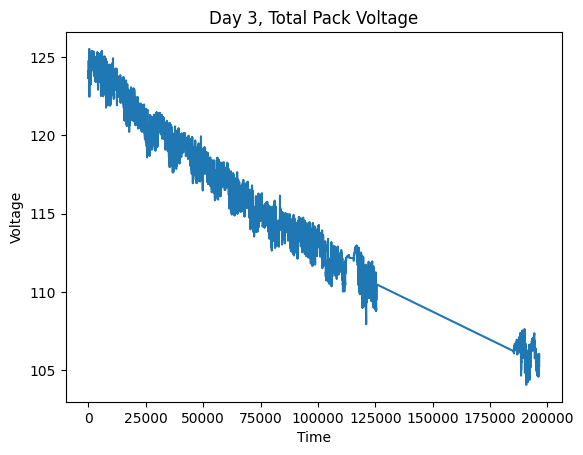

In [4]:
import matplotlib.pyplot as plt
from data_tools import DBClient

from soc_from_voltage import (cell_soc_from_voltage,
                              cell_wh_from_voltage,
                              get_day_voltage_data)

client = DBClient()

day_3_minimum_module, day_3_pack_voltage = get_day_voltage_data(3, client)

plt.plot(day_3_minimum_module)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Day 3, Min. Module Voltage')
plt.show()

plt.plot(day_3_pack_voltage)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Day 3, Total Pack Voltage')
plt.show()

The methods I have created from the datasheet are used for single cell voltages. Modules contain parallel cells, so we can call these methods on the time-varying minimum cell voltage.

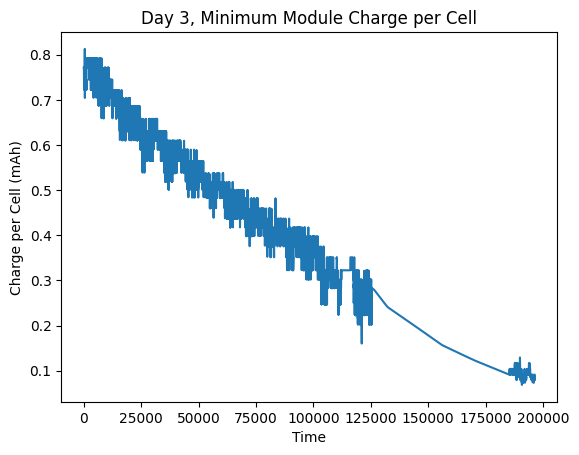

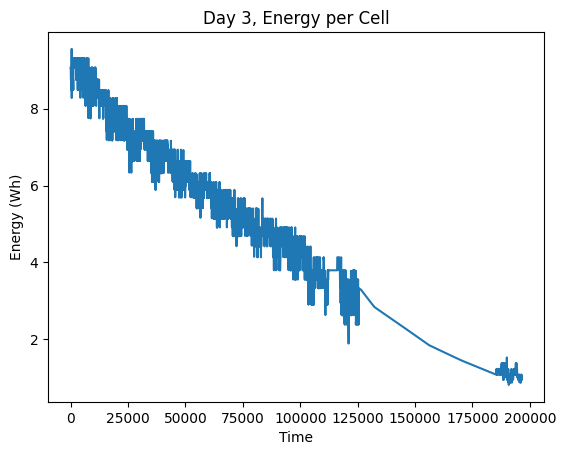

In [5]:
plt.plot(cell_soc_from_voltage(day_3_minimum_module))
plt.xlabel('Time')
plt.ylabel('Charge per Cell (mAh)')
plt.title('Day 3, Minimum Module Charge per Cell')
plt.show()

plt.plot(cell_wh_from_voltage(day_3_minimum_module))
plt.xlabel('Time')
plt.ylabel('Energy (Wh)')
plt.title('Day 3, Energy per Cell')
plt.show()